# Homework 1: Python Intro & Simple Statistics

Jake Dame

24 May 2024

CS 6017: Data Analytics & Visualization

Dr. Ben Jones

## PART 1: Mean, Std, Histogram

### 1. Functions for mean and standard deviation

In [188]:
def compute_mean(x):
    return sum(x) / len(x)

In [189]:
from math import sqrt

def compute_std(x):
    
    # We need the mean of the set
    mean = compute_mean(x)

    # Calculate the deviation from the mean for each of the values; then square each
    squared_deviations_list = [(_ - mean) ** 2 for _ in x]

    # Compute the average of all of those values; gives us the "variance"
    variance = compute_mean(squared_deviations_list)

    # Calculate the square of the variance
    return sqrt(variance)

### 2. Compare my functions to numpy functions

In [190]:
import numpy as np

# scipy can give us a bunch of random values (rv's) that will be normally distributed
import scipy
rv_list = scipy.stats.norm.rvs(size=1000)

print(compute_std(rv_list))
print(np.std(rv_list))

0.9842231764943138
0.9842231764943135


There is a slight difference in value when you get down to ≈15 decimal points. This is probably due to differences between my implementation and what is going on under the hood in numpy (the internals of which I am unaware). But, with Python, as in any other standard language, without specifiying some kind of precision, fp numbers are going to be different depending on how they are calculated. This is why you should should never directly compare fp nums.

### 3. Plot histogram of above values

(array([  5.,  13.,  64., 117., 207., 243., 198., 118.,  27.,   8.]),
 array([-3.26145926, -2.64070694, -2.01995461, -1.39920228, -0.77844995,
        -0.15769763,  0.4630547 ,  1.08380703,  1.70455935,  2.32531168,
         2.94606401]),
 <BarContainer object of 10 artists>)

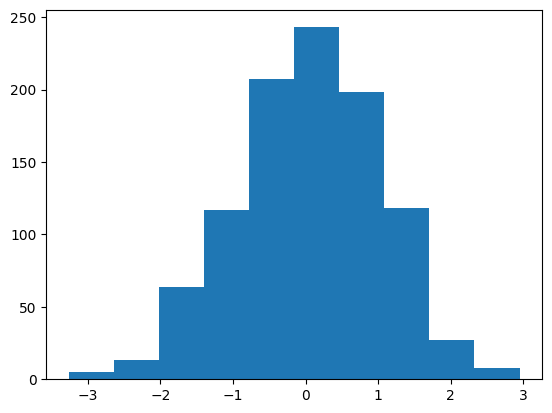

In [191]:
import matplotlib.pyplot as plt

plt.hist(rv_list)

## PART 2: Data Analysis of PM2.5

### Plot all values for the year (for one station)

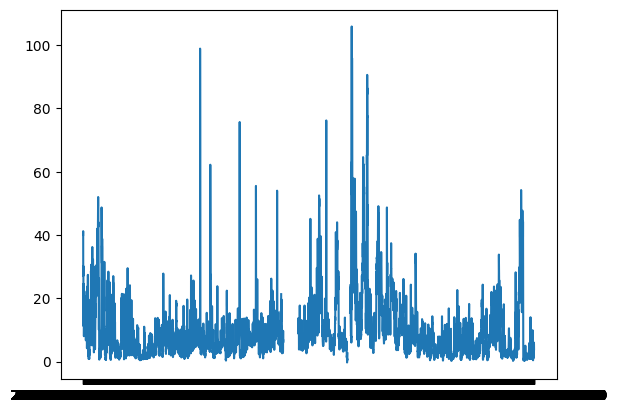

In [192]:
import pandas as pd

frame_2021 = pd.read_csv('2021-PM2.5.csv')

plt.plot(frame_2021['Date'], frame_2021['BV-MC'])

### Plot monthly averages

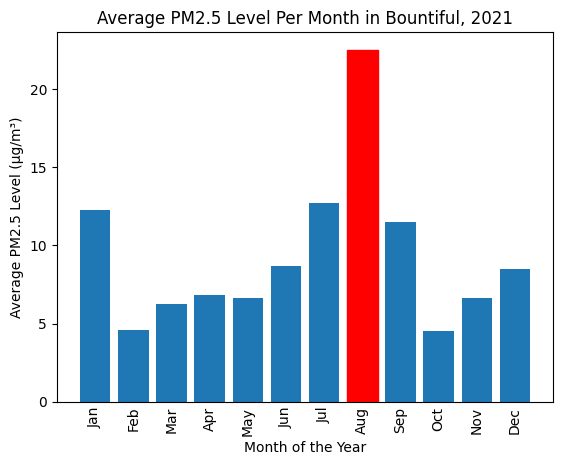

In [193]:
# Create/assign a new column called Month using the Series returned by to_datetime
# to_datetime took the Date column of the original frame, converted it to datetime format, and grouped it by month (1,2,3,...)
# This makes it easier to work with because each '1' index in the Month column will now correspond only January values in BV_MC
frame_2021['Month'] = pd.to_datetime(frame_2021['Date']).dt.month

# Use Month as index column, group all identical values per month index and calculate the mean for each
monthly_avgs = frame_2021.groupby('Month')['BV-MC'].mean()

# Display the plot and create an object of the plot to manipulate and tweak
monthly_avgs_plot = plt.bar(monthly_avgs.index, monthly_avgs.values)

# Use the index of the max value of the series (pd.idxmax() method) to emphasize the peak month in red
# Have to do - 1 to account for offset in 1-indexed Months series
monthly_avgs_plot[monthly_avgs.idxmax() - 1].set_color('red')

# Give meaningful labels to plot
plt.title('Average PM2.5 Level Per Month in Bountiful, 2021')
plt.xlabel('Month of the Year')
plt.ylabel('Average PM2.5 Level (µg/m³)')

# Create custom labels for easy reading. Empty '' and range(13) again due to 1-indexed Months series
month_labels = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(13), labels=month_labels, rotation=90)

# Hide the little tickmarks because I don't like them for this bar plot
plt.tick_params(axis='x', which='both', length=0)

#### Insights

Well it seems like pollution spikes dramatically in August, and is higher in general in warmer months (June-September).

My best guess for August is wildfires - either fires in Utah or fires in other western states. I would wonder how 2021 compared to other years in terms of fires (if my guess is correct, that is), i.e., if 2021 is an outlier among other years. Maybe in other years, July peaked because of a July wildfire, and August was closer to the summer average, etc.

I actually expected winter to be much worse than summer (the opposite of what is shown in the data) because of the cold air trapping PM2.5 in the valleys (inversion stuff).

But in summer, more people would be out doing things, and traveling. Perhaps summer travel at the airport and air travel peaking in the summer is a contributor. Perhaps A/C, too (although I don't know how that compares to heating in the winter in terms of where/how much pollution is produced by A/C vs. heating).

### Plot hourly averages

Same procedure as for months, but for hour

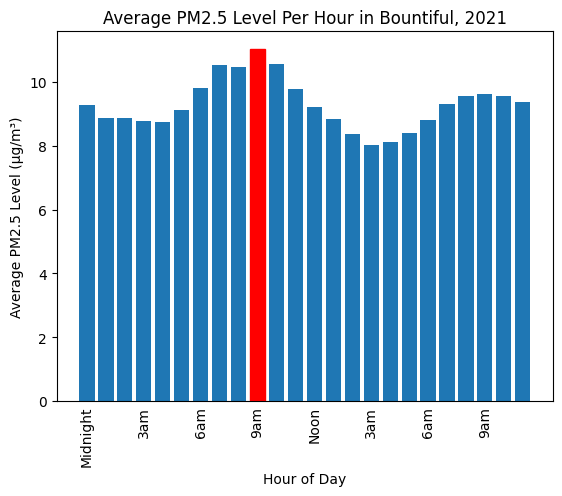

In [194]:
frame_2021['Hour'] = pd.to_datetime(frame_2021['Date']).dt.hour

hourly_avgs = frame_2021.groupby('Hour')['BV-MC'].mean()

hourly_avgs_plot = plt.bar(hourly_avgs.index, hourly_avgs.values)

# Use the index of the max value of the series (pd.idxmax() method) to emphasize the peak of the day in red
hourly_avgs_plot[hourly_avgs.idxmax()].set_color('red')

plt.title('Average PM2.5 Level Per Hour in Bountiful, 2021')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5 Level (µg/m³)')

custom_labels = [''] * 24
custom_labels[0] = 'Midnight'
custom_labels[3] = '3am'
custom_labels[6] = '6am'
custom_labels[9] = '9am'
custom_labels[12] = 'Noon'
custom_labels[15] = '3am'
custom_labels[18] = '6am'
custom_labels[21] = '9am'
plt.xticks(ticks=range(24), labels=custom_labels, rotation=90)
plt.tick_params(axis='x', which='both', length=0)

#### Insights

Morning rush hour is bad.

It falls back to (close to) average levels for the afternoon, but escalates again during evening rush hour.

Concerning evening rush hour, there seems to be a bit of a lag (because it says pollution peaks at 8pm, which seems pretty late for any kind of heavy traffic). My guess is that there is some kind of temperature/air pressure/atmospheric stuff at play here? It's a hotter time of day (for half of the year, at least), and the way particulate matter settles in layers of air or moves dynamically before it settles and is sensed by the monitor may have something to do with it.

This does not appear to be the case in the morning hours, where the rising PM levels make sense. Again, I'd imagine this is distinct from the evening because of something to do with daytime temperature. So it still matches my hypothesis.

The lowest time of day is actually 3 in the afternoon, which is surprising. I would have thought that it would be 3 in the morning, or something like that. My guess is that wind activity during the daytime (since wind kicks up during the warm/hot daytime) might clear out some of the bad air and bring some fresher air in, which might counteract the fact that everyone is awake and out doing things, and pumping A/C into their houses.

### Box plots of the raw values (not averages)

### By Month

Text(0, 0.5, 'PM2.5 Level (µg/m³)')

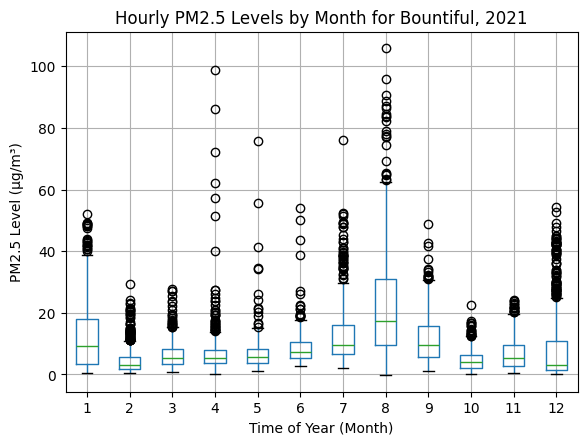

In [195]:
frame_2021.boxplot(column='BV-MC', by='Month')

plt.suptitle('') # get rid of the automatic title .boxplot() does
plt.title('Hourly PM2.5 Levels by Month for Bountiful, 2021')
plt.xlabel('Time of Year (Month)')
plt.ylabel('PM2.5 Level (µg/m³)')

#### Insights

May had the least amount of outlier days (eyeballing it).

November had a lot of outlier days, but all of them were barely outliers (all were close to the median).

April had quite a few pretty bad outlier days compared to other months.

Data tends to be more scattered outside of winter (≈Apr-Sept) = more variability in warmer months.

June had the highest minimum PM2.5 level.

### By Hour

Text(0, 0.5, 'PM2.5 Level (µg/m³)')

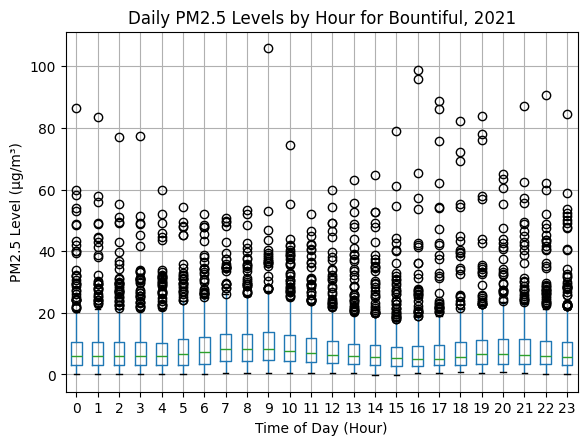

In [196]:
frame_2021.boxplot(column='BV-MC', by='Hour')

plt.suptitle('') # get rid of the automatic title .boxplot() does
plt.title('Daily PM2.5 Levels by Hour for Bountiful, 2021')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('PM2.5 Level (µg/m³)')

#### Insights

The data seems to be most scattered in the evening hours.

6pm and 8pm have the lowest minimums. Not really meaningful because it's just barely.

The median seems to be about the same throughout the entire day.